**Linear and Logistic Regression**<br>

**Question-1: part-a**<br>
for conditional distribution,<br>
$P(Y \mid X=x), mean(\mu) = E(Y \mid X=x) = \int y.P(Y \mid X=x)\,dy$<br>
it gives the most likely value of y for a given x<br>
if we consider the cost function $J(y) = E[(Y-y)^2 \mid X=x]$<br>
it is minimized when $y = E(Y \mid X=x)$ <br>
so, the mean of $P(y \mid x)$ gives the best estimate of y

**Question-1:part-b**<br>

(4, 1) (4, 1)
[[0.35]
 [1.35]]


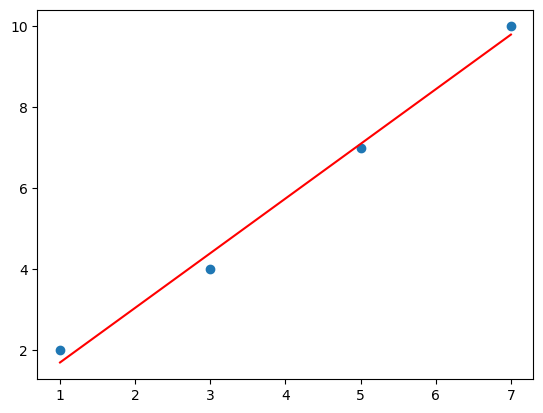

In [6]:
#vanilla regression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def vanilla_regression(x, y):
    x = np.c_[np.ones((x.shape[0], 1)), x]
    weights = np.matmul(np.linalg.inv(np.matmul(x.T, x)), np.matmul(x.T, y))
    return weights

x = np.array([[1], [3], [5], [7]])
y = np.array([2, 4, 7, 10]).reshape(4, 1)
print(x.shape, y.shape)
weight = vanilla_regression(x, y)
print(weight)
plt.scatter(x, y)
plt.plot(x, x*weight[1]+weight[0], color='red')

so, the vanilla regression equation is $y = \theta^T.x+e$<br>
where e is the error term and e follows $N(0, \sigma^2)$<br>
$P(e^{i}) = \frac{1}{\sqrt(2\pi)\sigma}exp(-\frac{(e^i)^2}{2\sigma^2})$<br>
where, $e^i = y^i-\theta^T.x^i$<br>
so, the choice of $\sigma$ does effect the estimation of coefficients/weights of the model.<br>
but the choice of $\sigma$ affect the probabilistic interpretation of the model.<br>
it will explain about the uncertainities in the predictions of the model.<br>
i.e, if $\sigma$ is lower then the predictions are more precise.<br>

**Question-2**<br>


evaluation of test_a on model_A: mse=22.257707343714326, mae=3.022001088614016
evaluation of test_b on model_A: mse=2.561655052277386, mae=1.6005169594562663
evaluation of test_c on model_A: mse=0.06245723680329719, mae=0.2011317596772389
evaluation of test_a on model_B: mse=32.73219379378805, mae=4.0724401520714
evaluation of test_b on model_B: mse=5.235524381722455e-25, mae=5.911768852229216e-13
evaluation of test_c on model_B: mse=2.6140814129669625, mae=1.5973892469179
evaluation of test_a on model_C: mse=16.156746682235802, mae=2.968920236153024
evaluation of test_b on model_C: mse=15.774197648433649, mae=3.9716712317951997
evaluation of test_c on model_C: mse=5.699794881411248, mae=2.3742819848775447


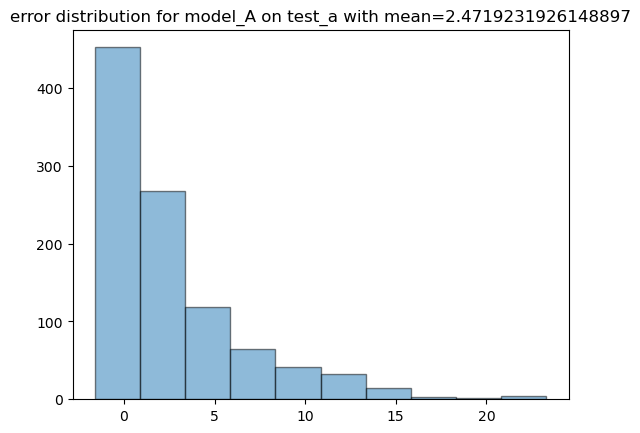

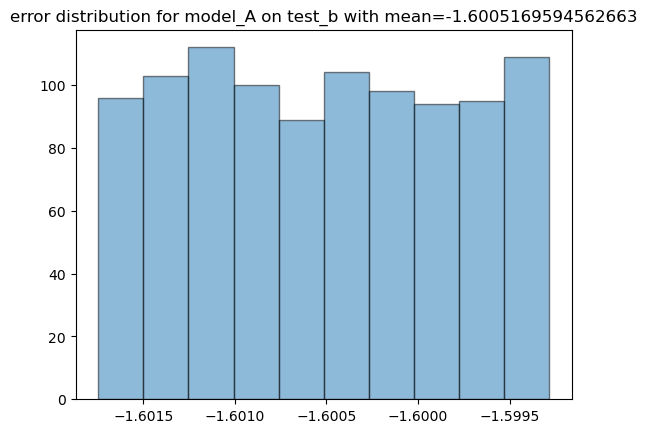

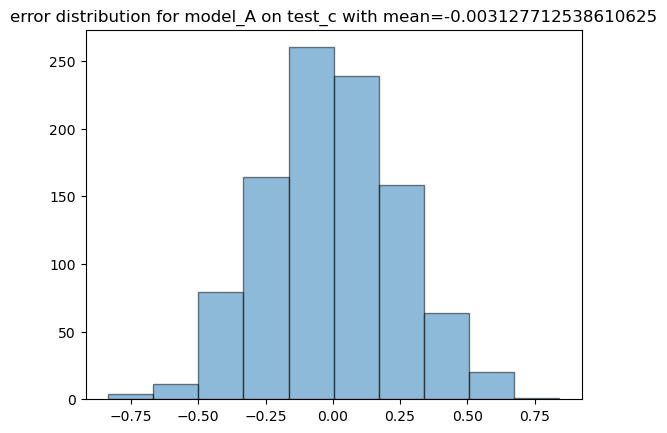

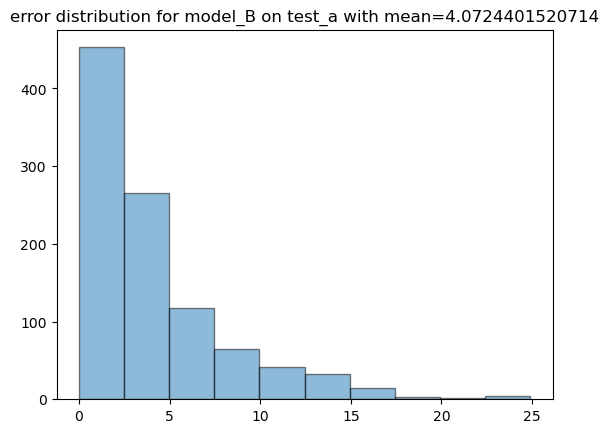

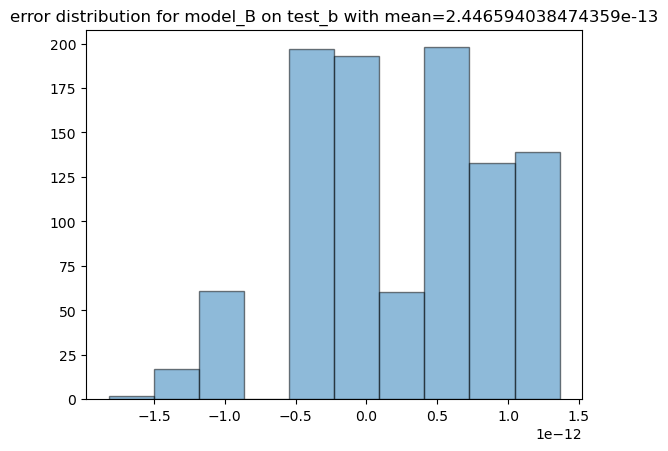

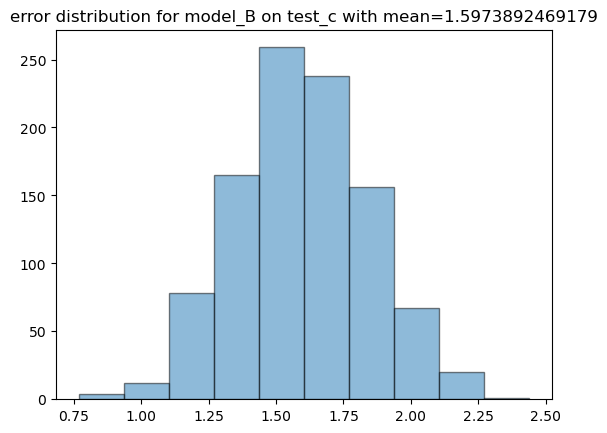

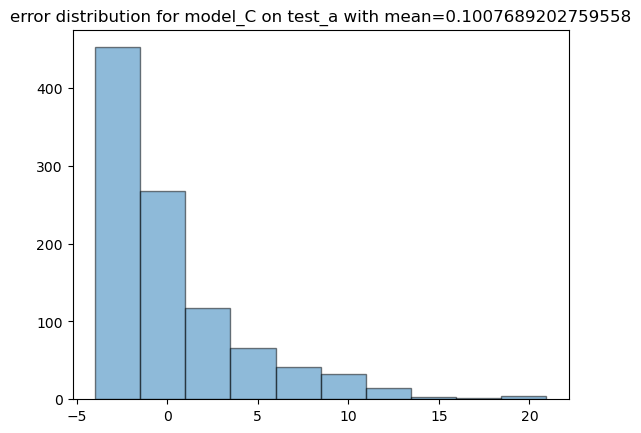

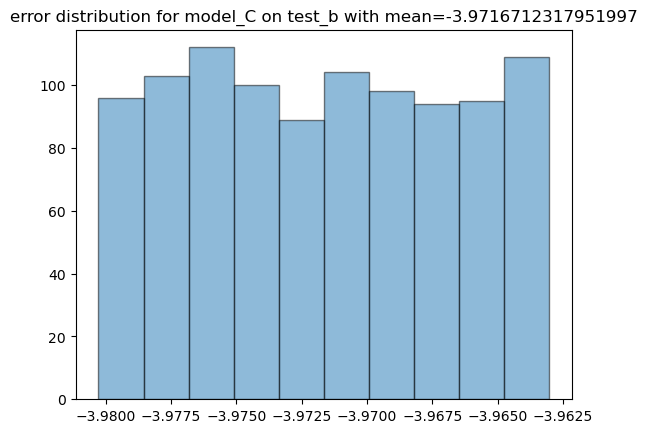

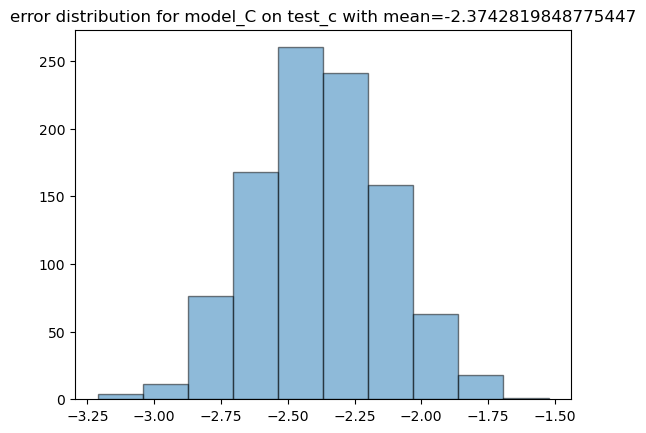

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline
train_a = pd.read_csv("train_set_A.csv")
train_b = pd.read_csv("train_set_B.csv")
train_c = pd.read_csv("train_set_C.csv")
test_a = pd.read_csv("test_set_A.csv")
test_b = pd.read_csv("test_set_B.csv")
test_c = pd.read_csv("test_set_C.csv")
model_a = LinearRegression()
model_b = LinearRegression()
model_c = LinearRegression()
model_a.fit(train_a[['x']], train_a['y'])
model_b.fit(train_b[['x']], train_b['y'])
model_c.fit(train_c[['x']], train_c['y'])
def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse,mae,y_pred

results = {
    'model_A':{
        'test_a':evaluate(model_a, test_a[['x']], test_a['y']),
        'test_b':evaluate(model_a, test_b[['x']], test_b['y']),
        'test_c':evaluate(model_a, test_c[['x']], test_c['y'])
    },
    'model_B':{
        'test_a':evaluate(model_b, test_a[['x']], test_a['y']),
        'test_b':evaluate(model_b, test_b[['x']], test_b['y']),
        'test_c':evaluate(model_b, test_c[['x']], test_c['y'])
    },
    'model_C':{
        'test_a':evaluate(model_c, test_a[['x']], test_a['y']),
        'test_b':evaluate(model_c, test_b[['x']], test_b['y']),
        'test_c':evaluate(model_c, test_c[['x']], test_c['y'])
    }
}
for model in results:
    for test_set in results[model]:
        mse,mae,_=results[model][test_set]
        print(f'evaluation of {test_set} on {model}: mse={mse}, mae={mae}')

def ploting(y_test, y_pred, title):
    errors = y_test-y_pred
    mean = np.mean(errors)
    plt.hist(errors, alpha=0.5, edgecolor='black')
    plt.title(title+f' with mean={mean}')
    plt.show()
    
for model in results:
    for test_set in results[model]:
        _, _, y_pred = results[model][test_set]
        y_test = eval(f"test_{test_set.split('_')[1]}['y']")
        ploting(y_test, y_pred, f'error distribution for {model} on {test_set}')

so, if a model is trained on the true distribution, then it will capture the patterns leading to accurate precitions.<br>
so, according to the plots of the errors while predicting from trained models.<br>
model_A will get less errors in the test set c, following a normal distribution with mean=0 and std~0.2<br>
so, train_set_A and test_set_C belong to the actual distribution.<br>

**Question-3**<br>

accuracy using gradient descent:0.95 with run-time:0.4502067565917969
accuracy using newton method:0.948 with run-time:0.07857275009155273


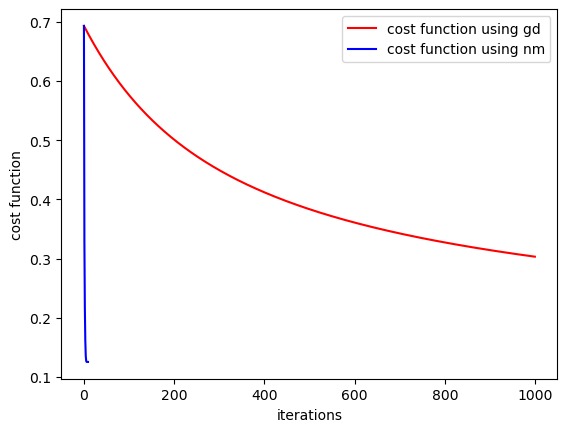

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time
#consider, the equation with 3 features and a bias term(intercept)
np.random.seed(42)
def generate_dataset(n):
    x = np.random.randn(n, 3)
    true_weights = [2, -1.9, 4.2]
    y = (np.dot(x, true_weights) + np.random.randn(n))>0
    y = y.astype(int)
    return x,y
x, y = generate_dataset(1000)
x = np.c_[np.ones((x.shape[0], 1)), x]
def sigmoid(z):
    return 1/(1+np.exp(-z))
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    z = np.clip(sigmoid(z), 1e-15, 1-1e-15)
    logl = np.mean(y*np.log(z)+(1-y)*np.log(1-z))
    return logl
def predict_proba(x, weights):
    z = sigmoid(np.dot(x, weights))
    return z
def predict(x, weights):
    z = sigmoid(np.dot(x, weights))
    return (z>=0.5).astype(int)
def batch_gd(x, y, learning_rate=0.01, epoch=1000):
    weights = np.zeros(x.shape[1])
    n = x.shape[0]
    errors = []
    for _ in range(epoch):
        prediction = predict_proba(x, weights)
        error = -log_likelihood(x, y, weights)
        errors.append(error)
        gradient = np.dot(x.T, prediction-y)/n
        weights = weights - learning_rate*gradient
    return weights,errors
def newton_method(x, y, epoch=10):
    weights = np.zeros(x.shape[1])
    errors = []
    for _ in range(epoch):
        predictions = predict_proba(x, weights)
        error = -log_likelihood(x, y, weights)
        errors.append(error)
        gradient = np.dot(x.T, predictions-y)
        w = np.diag(predictions*(1-predictions))
        hessian = np.dot(np.dot(x.T, w), x)
        weights = weights-np.dot(np.linalg.inv(hessian), gradient)
    return weights, errors

start_time_gd = time.time()    
weights_gd, errors_gd = batch_gd(x, y)
end_time_gd = time.time()
run_time_gd = end_time_gd-start_time_gd
start_time_nm = time.time()
weights_nm, errors_nm = newton_method(x, y)
end_time_nm = time.time()
run_time_nm = end_time_nm-start_time_nm
y_pred_gd = predict(x, weights_gd)
y_pred_nm = predict(x, weights_nm)
accuracy_gd = accuracy_score(y, y_pred_gd)
accuracy_nm = accuracy_score(y, y_pred_nm)
print(f'accuracy using gradient descent:{accuracy_gd} with run-time:{run_time_gd}')
print(f'accuracy using newton method:{accuracy_nm} with run-time:{run_time_nm}')
x1 = np.arange(0, 1000)
x2 = np.arange(0, 10)
plt.plot(x1, errors_gd, color='red', label='cost function using gd')
plt.plot(x2, errors_nm, color='blue', label='cost function using nm')
plt.xlabel('iterations')
plt.ylabel('cost function')
plt.legend()

out of these 2 optimization method,<br>
newthon method is converging fastly towards the minimum with less run-time and iterations<br>
but, accuracy of using gradient descent method is more<br>
so, out of these two optimization methods newton-method could be a better one if computational efficiency is the priority.<br>
but, if no.of parameters increases then it will be difficult to find inverse for hessian matrix.<br>
otherwsie, if accuracy is considered then, gradient descent could be better one.<br>

**Question-4**<br>

**part-a:extremely large sample size and less number of predictors**<br>
a flexible model can capture the underlying patterns in the data.so, the model fits the data leading to very low bias.<br>
in this scenario, bias-variance tradeoff is more focused on reducing bias.the large sample size get rid of the risk of overfitting, leading to a model with low variance.<br>
**part-b:sample size is small and extremely large no.of predictors**<br>
a flexible model may capture the noise along with the underlying pattern leading to high variance and poor generalization.<br>
in this scenario, reducing variance is more crucial part.because, parameters are more and sample size is less, a complex model<br> can capture the noise more along with the data.<br> 
so, inflexible methods can perform better in this scenarios such as linear regression etc..<br>
**part-c:relationship between predictors and response is highly non-linear**<br>
a flexible model can capture the complex patterns in the data, but inflexible methods struggle to fit the data<br>
in this scenario, the bias-variance tradeoff tends towards reducing the bias.<br>

**EXPONENTIAL FAMILY AND GLMs**<br>

**Question-1:part-a**<br>

given, $P(y; \phi) = (1-\phi)^{y-1} \phi$<br>
$P(y; \phi) = exp\left((y-1)log(1-\phi)+log({\phi})\right)$<br>
$P(y; \phi) = exp\left(ylog(1-\phi)+log(\frac{\phi}{1-\phi})\right)$<br>
Now, the geometric distribution equation is in the form of exponential family<br>
from the equation,<br>
$b(y) = 1$<br>
$T(y) = y$<br>
$\eta = log\left({1-\phi}\right)$<br>
$a(\eta) = log\left(\frac{\phi}{1-\phi}\right) = log\left(e^{-\eta}-1\right)$<br>

**Question-1:part-b**<br>

Given, $\mu = \frac{1}{\phi}$<br>
perfroming regression using the GLM model with a geometric response variable<br>
the canonical response function is,<br>
$\mu = E[y; \eta] = g(\eta)$<br><br>
where, $\phi = 1-e^{\eta}$<br>
$g(\eta) = \frac{1}{\phi} = \frac{1}{1-e^{\eta}}$<br><br>

**Question-1:part-c**<br>
stochastic gradient ascent update rule<br>

$log(P(y^{(i)} \mid x^{(i)};\theta)) = log(b(y)) + {\eta}T(y) -a(\eta)$<br> 
$log(P(y^{(i)} \mid x^{(i)};\theta)) = {\eta}T(y) -a(\eta)$<br>
let, $\eta^{(i)} = x^{(i)T}.\theta$<br>
$log(P(y^{(i)} \mid x^{(i)};\theta)) = y^{(i)}(x^{(i)T}.\theta) - log\left(e^{-x^{(i)T}.\theta}-1\right)$<br>
now differentiate with $\theta_j$ to obtain the gradeint <br>
$\frac{\partial \log p(y^{(i)} | x^{(i)}; \theta)}{\partial \theta_j} = y^{(i)} x_j^{(i)} + \left( \frac{e^{-x^{(i)T} \theta}}{e^{-x^{(i)T} \theta} - 1} \right) x_j^{(i)}$<br>
so, $\theta_j = \theta_j + \alpha\frac{\partial \log p(y^{(i)} | x^{(i)}; \theta)}{\partial \theta_j}$<br><br>
$\theta_j = \theta_j + {\alpha}\left(y^{(i)} x_j^{(i)} + \left( \frac{e^{-x^{(i)T} \theta}}{e^{-x^{(i)T} \theta} - 1} \right) x_j^{(i)}\right)$<br>

**Question-2**<br>
consider a linear regression with normal distribution for response variable y<br>

In [12]:
import numpy as np
#simple linear regression model y = 1.5x1+3.7x2+8.9
np.random.seed(42)
sample_size=1000
x = np.random.randn(1000, 2)#two features
true_parameters = np.array([1.5, 3.7, 8.9])
x = np.c_[np.ones(x.shape[0]), x]
y = np.dot(x, true_parameters) + np.random.normal(0, 1, sample_size)
#generate response variable with some noise following normal distribution

#now, train a corresponding regression model on the generated dataset
theta = np.ones(x.shape[1])
learning_rate=0.001
iterations=1000
sigma = 1.0
def log_likelihood(x, y, theta, sigma):
    n = len(y)
    ll = (1/2)*n*np.log(2*np.pi*(sigma**2))+(1/(2*(sigma**2)))*np.sum((y - np.dot(x, theta))**2)
    return -ll
#optimize the log_likelihood
#using gradient descent for optimization
def gradient_descent(theta, learning_rate, iterations, x, y, sigma):
    for i in range(iterations):
        error = y - np.dot(x, theta)
        gradient = np.dot(x.T, error)/(sigma)**2
        theta+=(learning_rate)*gradient
    return theta
learned_parameters = gradient_descent(theta, learning_rate, iterations, x, y, sigma)
print(f'the learned parameters of the corresponding regression model is{learned_parameters}')

the learned parameters of the corresponding regression model is[1.50393544 3.72776697 8.91715091]
